# Genome Overview

## Introduction

This notebook summarize a comprehensive overview of BGCs detected across the genomes in the snakemake run. 

### Table of Contents
* Step 1: Import required python packages for the notebook
* Step 2: Query and investigate the dataframe for initial assessment
* Step 3: Visualize the dataframe

### Data directory structure

    1. ../../data/interim/antismash : Output folders for all genomes in analysis (also used as input for BiGSCAPE software). 
    2. ../../data/processed/tables : Directory for raw tables generated by snakemake
        2.1. ../../data/processed/tables/df_genomes.csv (Raw output table with information on genomes contained in the antismash directory)     
        2.2. ../../data/processed/tables/df_bgc_products.csv (Raw output table with information on BGC product distribution contained in the antismash directory) 
    3. ../tables : Directory to save user defined tables (from notebook)
    4. ../figures : Directory to save figures (from notebook)

### Load Libraries

In [1]:
# Packages used in the notebook
import sys, os # Directory and file management
from pathlib import Path

import pandas as pd # Dataframe
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization 
%matplotlib inline

In [2]:
# Custom packages from bgc_flow  
from bgcflow.visualization.vis_genome_overview import plot_hist, plot_bgc_dist, scatter_bgcs_len
from bgcflow.data.make_genome_dataset import update_bgc_info

## Reading and Filtering Genome Summary of the Runs

In [3]:
# Loading saved dataframe
df_samples = pd.read_csv('../../config/samples.csv')

# load raw tables
df_genomes = pd.read_csv('../../data/processed/tables/df_genomes.csv', index_col='genome_id')

In [4]:
# View df_genomes
df_genomes

,source,organism,genus,species,strain,closest_placement_reference,contigs,gc_content,genome_len,Kingdom,Phylum,Class,Order,Family,Genus,Species,Organism,bgcs_count,protoclusters_count,cand_clusters_count
genome_id,,,,,,,,,,,,,,,,,,,,
NBC_01270.1,custom,Streptomyces sp. NBC_01270,Streptomyces,sp.,NBC_01270,GCF_000719955.1,1,0.733802,7015026,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,21.0,34.0,35.0
NBC_01171.1,custom,Streptomyces sp. NBC_01171,Streptomyces,sp.,NBC_01171,GCF_004784475.1,1,0.716094,6584863,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces seoulensis,NaN,20.0,24.0,25.0
P8-2B-3.1,custom,Streptomyces sp. P8-2B-3,Streptomyces,sp.,P8-2B-3,GCF_000719955.1,1,0.733603,7099240,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,22.0,34.0,34.0
GCF_000359525.1,ncbi,Streptomyces albus strain J1074,Streptomyces,albus,J1074,GCF_000359525.1,1,0.733213,6841649,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,23.0,33.0,32.0
1223307.4,patric,Streptomyces sp. PVA 94-07,Streptomyces,sp.,PVA 94-07,GCF_000495755.1,3,0.730500,7106149,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,28.0,45.0,46.0


In [5]:
# Add BGC information
antismash_dir = "../../data/interim/antismash/"
df_genomes = update_bgc_info(antismash_dir, df_genomes)

In [6]:
df_genomes

,source,organism,genus,species,strain,closest_placement_reference,contigs,gc_content,genome_len,Kingdom,Phylum,Class,Order,Family,Genus,Species,Organism,bgcs_count,protoclusters_count,cand_clusters_count
genome_id,,,,,,,,,,,,,,,,,,,,
NBC_01270.1,custom,Streptomyces sp. NBC_01270,Streptomyces,sp.,NBC_01270,GCF_000719955.1,1,0.733802,7015026,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,21.0,34.0,35.0
NBC_01171.1,custom,Streptomyces sp. NBC_01171,Streptomyces,sp.,NBC_01171,GCF_004784475.1,1,0.716094,6584863,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces seoulensis,NaN,20.0,24.0,25.0
P8-2B-3.1,custom,Streptomyces sp. P8-2B-3,Streptomyces,sp.,P8-2B-3,GCF_000719955.1,1,0.733603,7099240,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,22.0,34.0,34.0
GCF_000359525.1,ncbi,Streptomyces albus strain J1074,Streptomyces,albus,J1074,GCF_000359525.1,1,0.733213,6841649,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,23.0,33.0,32.0
1223307.4,patric,Streptomyces sp. PVA 94-07,Streptomyces,sp.,PVA 94-07,GCF_000495755.1,3,0.730500,7106149,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,Streptomyces albidoflavus,NaN,28.0,45.0,46.0


## Querying genomes dataframe

As the next step of analysis, we will caryy out investigations on the generated tables. We will ask several questions such as how many genomes per genus and how many genomes per species.

You can learn more about splicing and searching of pandas dataframe to ask many of your own questions in this step.

In [7]:
# Find number of genomes per genus
df_genomes.groupby(by='genus').count()['source'].sort_values(ascending=False)

genus
Streptomyces    5
Name: source, dtype: int64

In [8]:
# Find number of genomes per species
df_genomes.groupby(by='species').count()['source'].sort_values(ascending=False)

species
sp.      4
albus    1
Name: source, dtype: int64

## Visualization of data

Now that we have investigated the dataframe to satisfy our initial curiousity, we will focus on more comprehensive visualizations of data by using histograms, scatter plots, heatmaps and such other tool. 

You can read many online sources on cool data visualizations using seaborn, pandas (https://seaborn.pydata.org/examples/index.html) 

Here, we will generate a histogram, scatter plot and a heatmap visualization and save these figures in pdf format. We will first create a function that can be used to manipulate the figures and then generate the figures.

<Figure size 864x576 with 0 Axes>

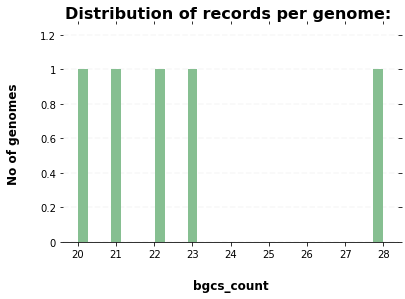

In [9]:
bgc_dist_path = '../../data/processed/figures/bgc_dist_all.pdf'
plot_bgc_dist(df_genomes, col_select='bgcs_count', to_path=bgc_dist_path)

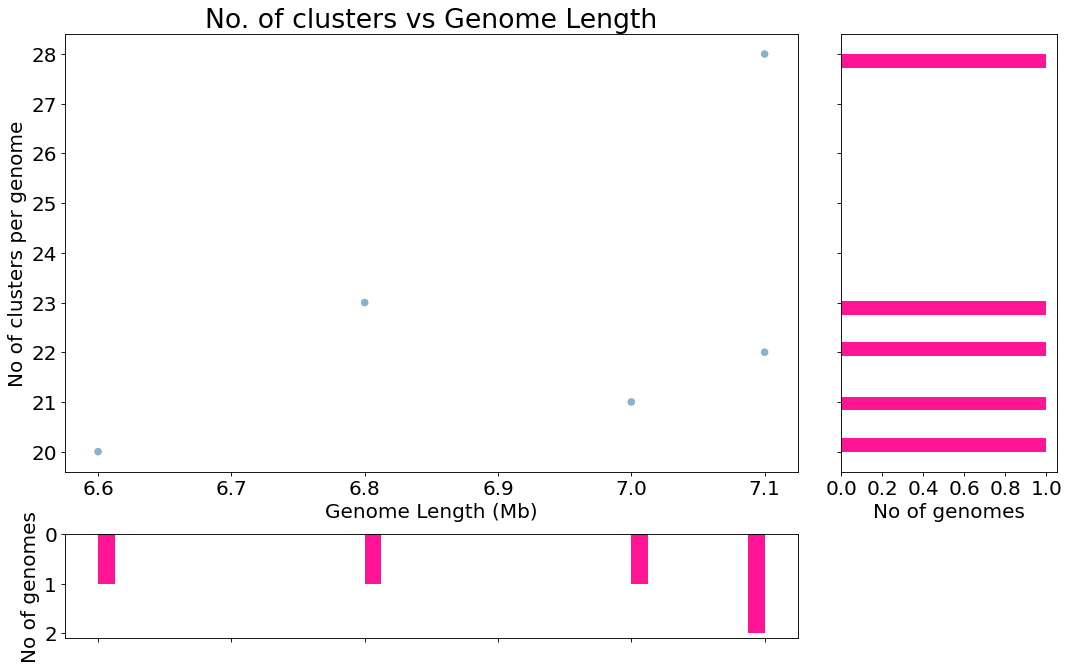

In [10]:
scat_path = '../../data/processed/figures/scatter_bgcs_len_all.pdf'
scatter_bgcs_len(df_genomes, to_path=scat_path)

In [11]:
df_genomes.to_csv('../../data/processed/tables/df_genomes.csv')